In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Install Kaggle package
!pip install kaggle

# Make a directory for Kaggle API key and move the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permissions to avoid security warnings
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# Download the dataset
!kaggle datasets download -d zalando-research/fashionmnist

# Unzip the dataset
!unzip fashionmnist.zip -d fashion_mnist_data

Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 80% 55.0M/68.8M [00:00<00:00, 162MB/s]
100% 68.8M/68.8M [00:00<00:00, 169MB/s]
Archive:  fashionmnist.zip
  inflating: fashion_mnist_data/fashion-mnist_test.csv  
  inflating: fashion_mnist_data/fashion-mnist_train.csv  
  inflating: fashion_mnist_data/t10k-images-idx3-ubyte  
  inflating: fashion_mnist_data/t10k-labels-idx1-ubyte  
  inflating: fashion_mnist_data/train-images-idx3-ubyte  
  inflating: fashion_mnist_data/train-labels-idx1-ubyte  


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load training and test data
train_df = pd.read_csv("fashion_mnist_data/fashion-mnist_train.csv")
test_df = pd.read_csv("fashion_mnist_data/fashion-mnist_test.csv")

# Split features and labels
X_train = train_df.iloc[:, 1:].values  # All columns except the first (pixel values)
y_train = train_df.iloc[:, 0].values   # First column (labels)

X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize pixel values (0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for TensorFlow (28x28 images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
# Load dataset from Keras (instead of Kaggle for simplicity)
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (scale between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images for PCA (from 28x28 to 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Split training data into training and validation sets
X_train_flat, X_val_flat, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f"Training shape: {X_train_flat.shape}, Validation shape: {X_val_flat.shape}, Test shape: {X_test_flat.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (48000, 784), Validation shape: (12000, 784), Test shape: (10000, 784)


In [7]:
# Define a simple neural network
baseline_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model and measure time
start_time = time.time()
history_baseline = baseline_model.fit(X_train_flat, y_train, epochs=10, validation_data=(X_val_flat, y_val), batch_size=32)
baseline_time = time.time() - start_time

# Evaluate the baseline model
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(X_test_flat, y_test)
print(f"\nBaseline Model Test Accuracy: {baseline_test_acc:.4f}, Training Time: {baseline_time:.2f} sec")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7666 - loss: 0.6813 - val_accuracy: 0.8450 - val_loss: 0.4255
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8571 - loss: 0.3952 - val_accuracy: 0.8587 - val_loss: 0.3848
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8734 - loss: 0.3471 - val_accuracy: 0.8620 - val_loss: 0.3757
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8836 - loss: 0.3167 - val_accuracy: 0.8655 - val_loss: 0.3621
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8915 - loss: 0.2946 - val_accuracy: 0.8720 - val_loss: 0.3495
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8960 - loss: 0.2803 - val_accuracy: 0.8756 - val_loss: 0.3498
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9007 - loss: 0.2658 - val_accuracy: 0.8773 - val_loss: 0.3438
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9067 - loss: 0.2517 -

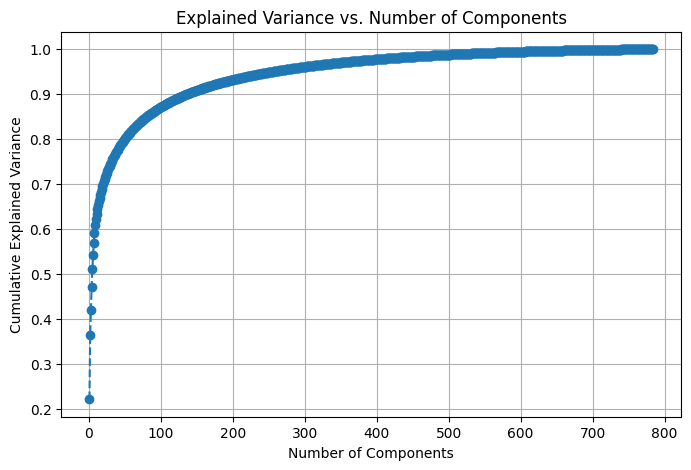

In [8]:
# Standardize data before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)
X_val_scaled = scaler.transform(X_val_flat)

# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Plot explained variance ratio
import matplotlib.pyplot as plt

explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 785), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [9]:
# Apply PCA with selected number of components
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"New shape after PCA: {X_train_pca.shape}")

New shape after PCA: (48000, 100)


In [10]:
# Define a neural network for PCA-reduced data
pca_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(100,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
pca_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train and measure time
start_time = time.time()
history_pca = pca_model.fit(X_train_pca, y_train, epochs=10, validation_data=(X_val_pca, y_val), batch_size=32)
pca_time = time.time() - start_time

# Evaluate PCA model
pca_test_loss, pca_test_acc = pca_model.evaluate(X_test_pca, y_test)
print(f"\nPCA Model Test Accuracy: {pca_test_acc:.4f}, Training Time: {pca_time:.2f} sec")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7785 - loss: 0.6599 - val_accuracy: 0.8619 - val_loss: 0.3927
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8735 - loss: 0.3507 - val_accuracy: 0.8723 - val_loss: 0.3601
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8864 - loss: 0.3091 - val_accuracy: 0.8742 - val_loss: 0.3468
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8960 - loss: 0.2826 - val_accuracy: 0.8782 - val_loss: 0.3449
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9034 - loss: 0.2619 - val_accuracy: 0.8796 - val_loss: 0.3544
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9091 - loss: 0.2473 - val_accuracy: 0.8807 - val_loss: 0.3517
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9148 - loss: 0.2309 - val_accuracy: 0.8816 - val_loss: 0.3505
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9201 - loss: 0.2177 - val_accura

In [11]:
print(f"Baseline Model Accuracy: {baseline_test_acc:.4f}, Training Time: {baseline_time:.2f} sec")
print(f"PCA Model Accuracy: {pca_test_acc:.4f}, Training Time: {pca_time:.2f} sec")

Baseline Model Accuracy: 0.8755, Training Time: 76.10 sec
PCA Model Accuracy: 0.8758, Training Time: 58.00 sec


In [25]:
import pandas as pd

# Load datasets
train_path = "/content/train.csv"
test_path = "/content/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display dataset info
print("Train Dataset Info:")
train_df.info()
print("\nTest Dataset Info:")
test_df.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uid                            50400 non-null  int64  
 1   day                            44921 non-null  object 
 2   hour                           44787 non-null  float64
 3   minute                         44930 non-null  float64
 4   C_motion                       44883 non-null  float64
 5   feed_water_motion              44803 non-null  float64
 6   faucet_hole                    44834 non-null  float64
 7   vapour_pressure                44921 non-null  float64
 8   vapour_enthalpy                44963 non-null  float64
 9   vapour_pressure_at_division    44923 non-null  float64
 10  vapour_motion                  44923 non-null  float64
 11  feed_water_enth                44904 non-null  float64
 12  vapour_temperature        

In [26]:
# Fill missing categorical values (day) with mode
train_df['day'].fillna(train_df['day'].mode()[0], inplace=True)
test_df['day'].fillna(test_df['day'].mode()[0], inplace=True)

# Fill missing numerical values with median
numerical_cols = train_df.select_dtypes(include=['float64']).columns
numerical_cols = [col for col in numerical_cols if col != "output_electricity_generation"]  # Exclude target from test

for col in numerical_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)

# Verify missing values are handled
print("Missing values in Train:", train_df.isnull().sum().sum())
print("Missing values in Test:", test_df.isnull().sum().sum())


Missing values in Train: 0
Missing values in Test: 0


<ipython-input-26-6e94c46e69d9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['day'].fillna(train_df['day'].mode()[0], inplace=True)
<ipython-input-26-6e94c46e69d9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [27]:
# One-hot encode 'day' column
train_df = pd.get_dummies(train_df, columns=['day'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['day'], drop_first=True)

In [28]:
import numpy as np

# Interaction Features
train_df["vapour_pressure_x_motion"] = train_df["vapour_pressure"] * train_df["vapour_motion"]
test_df["vapour_pressure_x_motion"] = test_df["vapour_pressure"] * test_df["vapour_motion"]

train_df["feed_water_enth_x_motion"] = train_df["feed_water_enth"] * train_df["feed_water_motion"]
test_df["feed_water_enth_x_motion"] = test_df["feed_water_enth"] * test_df["feed_water_motion"]

# Polynomial Features
train_df["vapour_pressure_sq"] = train_df["vapour_pressure"] ** 2
test_df["vapour_pressure_sq"] = test_df["vapour_pressure"] ** 2

train_df["feed_water_motion_sq"] = train_df["feed_water_motion"] ** 2
test_df["feed_water_motion_sq"] = test_df["feed_water_motion"] ** 2

# Log Transformations
train_df["log_vapour_enthalpy"] = train_df["vapour_enthalpy"].apply(lambda x: np.log(x + 1))
test_df["log_vapour_enthalpy"] = test_df["vapour_enthalpy"].apply(lambda x: np.log(x + 1))

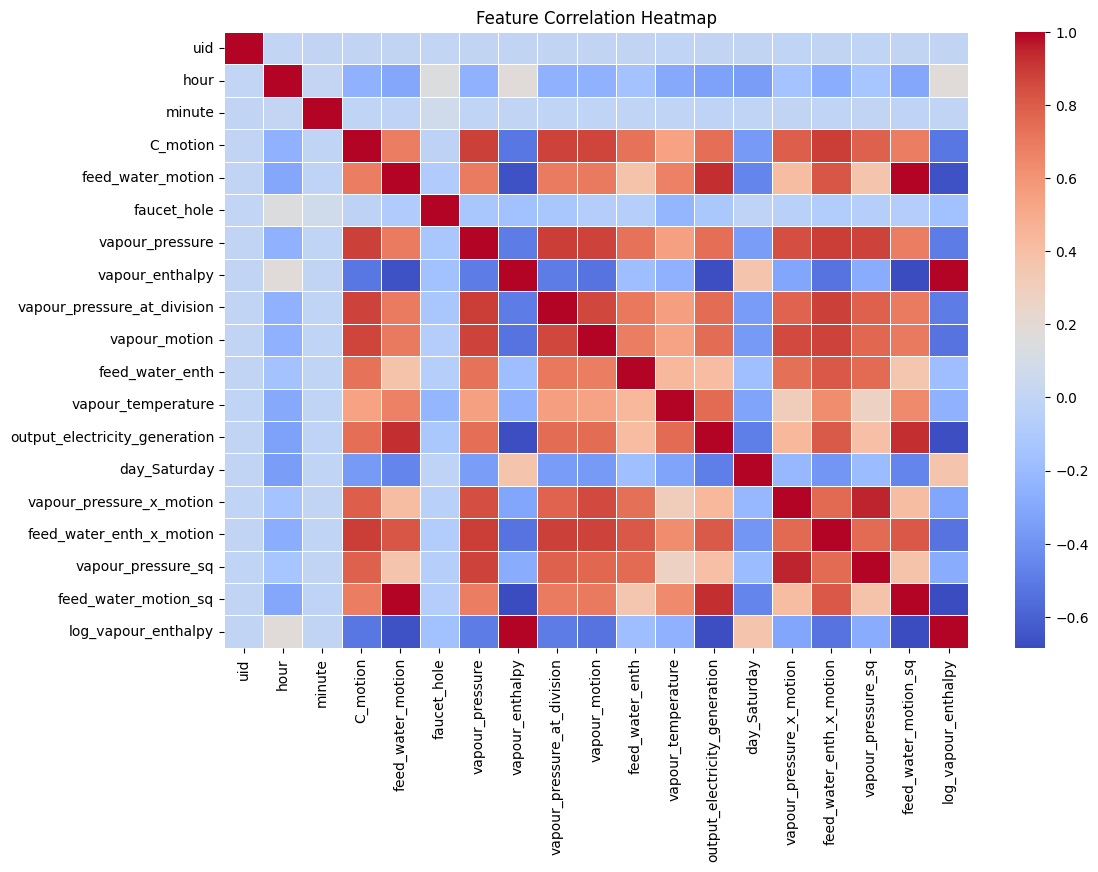

Remaining features after correlation-based selection: Index(['uid', 'hour', 'minute', 'C_motion', 'feed_water_motion', 'faucet_hole',
       'vapour_enthalpy', 'feed_water_enth', 'vapour_temperature',
       'day_Saturday'],
      dtype='object')


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Remove highly correlated features (threshold = 0.85)
correlation_threshold = 0.85
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop correlated features
train_df_filtered = train_df.drop(columns=correlated_features)
test_df_filtered = test_df.drop(columns=correlated_features, errors="ignore")

print("Remaining features after correlation-based selection:", train_df_filtered.columns)

In [30]:
print(train_df_filtered.columns)

Index(['uid', 'hour', 'minute', 'C_motion', 'feed_water_motion', 'faucet_hole',
       'vapour_enthalpy', 'feed_water_enth', 'vapour_temperature',
       'day_Saturday'],
      dtype='object')


In [31]:
# Ensure target column is retained
correlated_features.discard("output_electricity_generation")

# Drop correlated features but keep the target column
train_df_filtered = train_df.drop(columns=correlated_features)
test_df_filtered = test_df.drop(columns=correlated_features, errors="ignore")

print("Remaining features after filtering:", train_df_filtered.columns)


Remaining features after filtering: Index(['uid', 'hour', 'minute', 'C_motion', 'feed_water_motion', 'faucet_hole',
       'vapour_enthalpy', 'feed_water_enth', 'vapour_temperature',
       'output_electricity_generation', 'day_Saturday'],
      dtype='object')


In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define target variable
X = train_df_filtered.drop(columns=["output_electricity_generation", "uid"])
y = train_df_filtered["output_electricity_generation"]

# Initialize model
model = LinearRegression()

# Apply RFE (selecting top 8 features)
rfe = RFE(model, n_features_to_select=8)
X_rfe = rfe.fit_transform(X, y)

# Get selected feature names
selected_features_rfe = X.columns[rfe.support_]

print("Selected features from RFE:", selected_features_rfe)


Selected features from RFE: Index(['hour', 'C_motion', 'feed_water_motion', 'faucet_hole',
       'vapour_enthalpy', 'feed_water_enth', 'vapour_temperature',
       'day_Saturday'],
      dtype='object')


In [33]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

# Select important features
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X.columns[model.get_support()]

print("Selected features from Lasso Regression:", selected_features_lasso)

Selected features from Lasso Regression: Index(['hour', 'minute', 'C_motion', 'feed_water_motion', 'faucet_hole',
       'vapour_enthalpy', 'feed_water_enth', 'vapour_temperature',
       'day_Saturday'],
      dtype='object')


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into train & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Evaluate performance
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print(f"Baseline Model - MAE: {mae}, MSE: {mse}")

# Train Model on Selected Features (RFE)
X_train_rfe, X_val_rfe = X_train[selected_features_rfe], X_val[selected_features_rfe]
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_val_rfe)

mae_rfe = mean_absolute_error(y_val, y_pred_rfe)
mse_rfe = mean_squared_error(y_val, y_pred_rfe)
print(f"RFE Model - MAE: {mae_rfe}, MSE: {mse_rfe}")

# Train Model on Selected Features (Lasso)
X_train_lasso, X_val_lasso = X_train[selected_features_lasso], X_val[selected_features_lasso]
model.fit(X_train_lasso, y_train)
y_pred_lasso = model.predict(X_val_lasso)

mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
print(f"Lasso Model - MAE: {mae_lasso}, MSE: {mse_lasso}")


Baseline Model - MAE: 0.9296281483241302, MSE: 10.44892023259526
RFE Model - MAE: 0.9637672873749269, MSE: 11.228104876104052
Lasso Model - MAE: 0.9296281483241302, MSE: 10.44892023259526


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [36]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Standardizing the data

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


In [37]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df)  # Assign clusters

# Display first few rows with assigned clusters
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


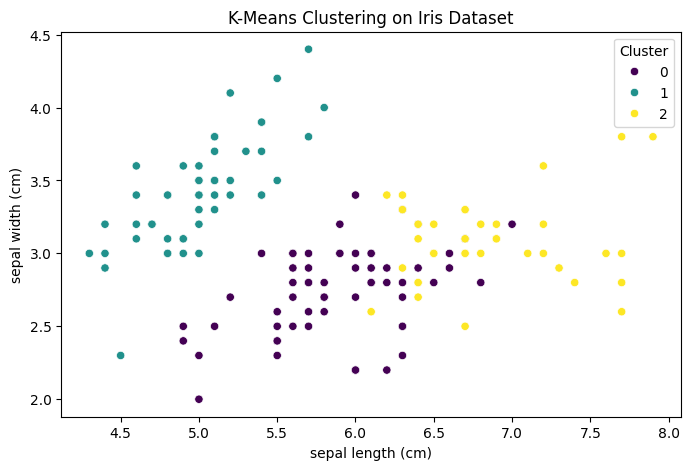

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[iris.feature_names[0]], y=df[iris.feature_names[1]], hue=df["Cluster"], palette="viridis")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering on Iris Dataset")
plt.show()


In [39]:
df["Actual Label"] = iris.target  # Add actual labels

# Compare cluster assignments with actual species
print(pd.crosstab(df["Cluster"], df["Actual Label"]))

Actual Label   0   1   2
Cluster                 
0              0  48  14
1             50   0   0
2              0   2  36
